In [2]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
import copy

In [4]:
    #Assigning column names to data
df=pd.read_csv('../input_data/data.csv')

In [3]:
#spliiting the data into test and train
Y=df['Chance of Admit ']
df=df.drop(['Serial No.','Chance of Admit '],axis=1)
X = (df - df.mean())/df.std()
X.insert(0,'x0',np.ones(len(X)))
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
# train = X[:350]
# test = X[350:]
# print test.shape
# train_X1=copy.deepcopy(train)

In [4]:
# train.insert(0,'x0',np.ones(len(train)))

In [5]:
# train_X=train
# train_Y=Y[:350]

In [6]:
num_features =train_X.shape[1]
alpha=0.5

In [7]:
xtx=train_X.T.dot(train_X)+alpha*np.identity(num_features)

In [8]:
XtX=np.linalg.inv(xtx)

In [9]:
xtx_xt=XtX.dot(train_X.T)

In [10]:
theta=xtx_xt.dot(train_Y)

In [11]:
def predict(theta,test_X,test_Y):
#     test_X.insert(0, 'x0', np.ones(len(test_X)))
    print test_X.shape
    pred=[]
    for row in range(len(test_X)):
        ans=0
        for i in range(len(test_X.columns)):
#             print test_X.iloc[row,i]
            ans+=theta[i]*test_X.iloc[row,i]
        pred.append(ans)
#         print "cool"
    print "r2_square is:-",r2_score(test_Y,pred)
    print "MSE is:-",((pred-test_Y)**2).sum()/len(test_Y)
    print "MAE is:-",(abs(pred-test_Y)).sum()/len(test_Y)
    print "MAPE is:-",((abs(pred-test_Y)/abs(test_Y)).sum()/len(test_Y))*100
    return pred

In [12]:
# test_X=test
# test_Y=Y[350:]
pred=predict(theta,test_X,test_Y)

(90, 8)
r2_square is:- 0.7368614420555955
MSE is:- 0.005522518153196768
MAE is:- 0.05183950051321388
MAPE is:- 8.747276453313907


In [13]:
print train_X.shape,test_X.shape

(360, 8) (90, 8)


In [14]:
#evaluating the model performance by comparing it with sklearn inbuilt model
reg = linear_model.Ridge(alpha=.01) 
# train the model using the training sets 
# train_X=train_X.drop('x0',axis=1)
reg.fit(train_X,train_Y)
pred2=reg.predict(test_X)
print r2_score(test_Y,pred2)
# calculate MAE, MSE,MAPE
print(mean_squared_error(test_Y,pred2))
print(mean_absolute_error(test_Y,pred2))
print "MAPE is:-",((abs(pred2-test_Y)/abs(test_Y)).sum()/len(test_Y))*100

0.7358392069068639
0.00554397191584488
0.05172646012055105
MAPE is:- 8.738407280940928


In [15]:
print train_X.shape,test_X.shape

(360, 8) (90, 8)


In [16]:
def predict(theta,test_X,test_Y):
    pred=[]
    for row in range(len(test_X)):
        ans=0
#         print test_X.iloc[row,0],theta[0]
        for i in range(len(test_X.columns)):
            ans+=theta[i]*test_X.iloc[row,i]
        pred.append(ans)
    err=mean_squared_error(test_Y,pred)
    print err
    return err

def theta_evaluation(train_X,alpha):
    num_features =train_X.shape[1]
    xtx=train_X.T.dot(train_X)+alpha*np.identity(num_features)
    XtX=np.linalg.inv(xtx)
    xtx_xt=XtX.dot(train_X.T)
    theta=xtx_xt.dot(train_Y)
    return theta

alpha_array=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

0.005539613938076646
0.005535206923153758
0.005530888733862242
0.005526659200330409
0.005522518153196768
0.005518465423606585
0.005514500843208455
0.0055106242441508866
0.005506835459079028
---------------
0.005542733535165529
0.005541365787126347
0.005540006641296212
0.005538656034655615
0.00553731390476168
0.005535980189741835
0.005534654828287573
0.005533337759648287
0.005532028923625179


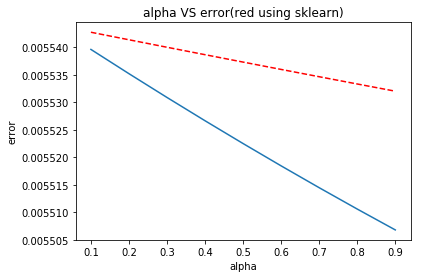

In [17]:
error_array=[]
error_array_scikit=[]
for alpha in alpha_array:
    theta=theta_evaluation(train_X,alpha)
    error_array.append(predict(theta,test_X,test_Y))
print "---------------"
for alpha2 in alpha_array:
    reg = linear_model.Ridge(alpha=alpha2,max_iter=1000)  
    reg.fit(train_X,train_Y)
    pred2=reg.predict(test_X)
    print mean_squared_error(test_Y,pred2)
    error_array_scikit.append(mean_squared_error(test_Y,pred2))

plt.plot(alpha_array,error_array) # Create line plot with red dashed line
plt.plot(alpha_array,error_array_scikit,'r--') #using scikit learn
plt.title('alpha VS error(red using sklearn)')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()